In [17]:
import numpy as np
class LR_GD:
    def __init__(self):
        self.coeff=[0,0]
    
    def fit(self,x,y,epochs,lr):
        m = x.shape[0]     #no of samples
        for i in range(epochs):
            h = x*self.coeff[1] + self.coeff[0]  #hypothesis fucntion
            error = h - y
            cost = sum(error*error)/(2*m)
            temp_coeff = self.coeff[1] - (lr/m)*sum(error*x)
            temp_b = self.coeff[0] - (lr/m)*sum(error)
            self.coeff[1] = temp_coeff
            self.coeff[0] = temp_b
    
    def predict(self,x):
        y = self.coeff[0] + self.coeff[1]*x
        return y
    
    def RSS(self,y,y_pred):
        error=y-y_pred
        rss=sum(error*error)        
        return rss
    
    def TSS(self,y):
        error=y-y.mean()
        tss=sum(error*error)
        
        return rss
    
    def R2(self,rss,tss): 
        r2=1-(rss/tss)
        return r2
    
    def MSE(self,rss,y):
        mse=rss/len(y)
        return mse

In [16]:
X = [42,37,30,50,43,47,46]
Y = [173,149,123,201,175,188,186]
x = np.array(X)
y = np.array(Y)
model = LR_GD()
model.fit(x,y,30,0.001)
y_pred = model.predict(46)
print("Number of Passengers when temp is 46 is {}".format(y_pred))

Number of Passengers when temp is 46 is 185.77284473800063


In [8]:
print('m: ', model.coeff[1])
print('b: ',model.coeff[0])

m:  4.036421855683573
b:  0.09743937655628325


### other way

In [16]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# load the data
data = fetch_california_housing()

# convert to pandas dataframe and normalize
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X = (X - X.mean()) / X.std()

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# create model and fit to training data
lr = LinearRegressionGD(lr=0.1, n_iters=1000)
lr.fit(X_train, y_train)

# make predictions on test data
y_pred = lr.predict(X_test)


ValueError: shapes (10,1) and (8,) not aligned: 1 (dim 1) != 8 (dim 0)

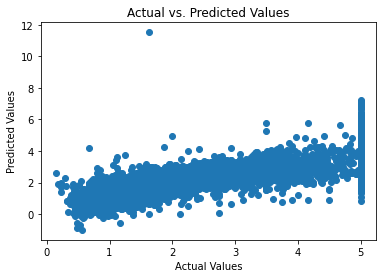

In [19]:
import matplotlib.pyplot as plt

# plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# plot best fit line
x_line = np.linspace(min(y_test), max(y_test), 10)
y_line = lr.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='red')

# show plot
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error: 0.5306298472092492
R2 Score: 0.5957229466358525
